In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import napari
from PIL import Image
from matplotlib import pyplot as plt


from scribbles_creator import *
from cellpose_data_handler import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create predictions/segmentations with Convpaint on the cellpose dataset (wit self-created scribbles)

In [11]:
folder_path = "./imgs/train"
all_suff = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
suff = all_suff[:1]
mode = "all"
layer_list = [0]
scalings = [1, 2]

for bin in [0.01]:#, 0.025, 0.05, 0.1, 0.25, 0.5, 1]:
    for img_num in range(0, 1):
        for s in suff:
            pred = pred_cellpose_convpaint(folder_path, img_num, mode, bin, s, layer_list, scalings, save_res=True, show_res=False)

## Analyse the created scribbles and segmentations (perc. labelled vs. acc.) from saved files

In [15]:
folder_path = "./imgs/train"
all_suff = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
suff = all_suff[:1]
mode = "all"

df = pd.DataFrame(columns=['group', 'image', 'ground truth', 'scribbles', 'prediction', 'mode', 'bin', 'perc. labelled', 'accuracy'])
for bin in [0.01]:#, 0.025, 0.05, 0.1, 0.25, 0.5, 1]:
    for img_num in range(0, 1):
        for s in suff:
            res = analyse_cellpose_single_file(folder_path, img_num, mode, bin, s, "convpaint", show_res=False)
            df = pd.concat([df, res], ignore_index=True)

C:\Users\roman\AppData\Local\Temp\ipykernel_12860\1898460071.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, res], ignore_index=True)


In [16]:
df[:5]

,group,image,ground truth,scribbles,prediction,mode,bin,perc. labelled,accuracy
0,0_all_0.01,./imgs/train/000_img.png,./imgs/train/000_ground_truth.png,./imgs/train/000_scribbles_all_0.01_a.png,./imgs/train/000_convpaint_all_0.01_a.png,all,0.01,0.009179,0.932497


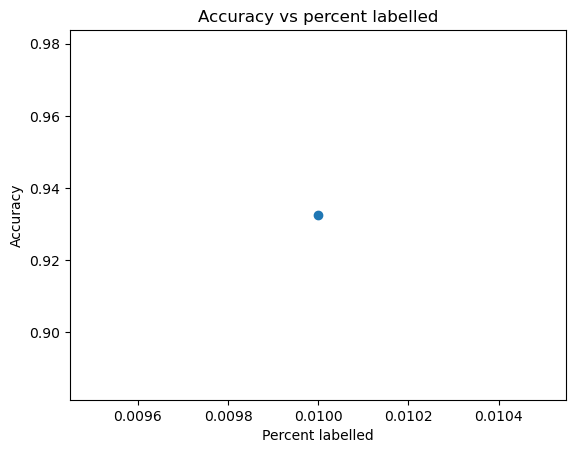

In [17]:
# Plot accuracy vs percent labelled
plt.figure()

# Scatterplot
# plt.scatter(df['perc. labelled'], df['accuracy'])
# plt.xlabel('Percent labelled')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs percent labelled')
# plt.show()

# Grouped plot
# For each picture, take the median; then for each bin, take the mean and standard deviation of the accuracy of all pictures and plot it versurs the percent labelled
df_grouped_img = df.groupby('group').agg({'bin': 'median', 'perc. labelled': 'median', 'accuracy': 'median'})
df_grouped_img
df_grouped_bin = df_grouped_img.groupby('bin').agg({'accuracy': ['mean', 'std'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped_bin['bin'], df_grouped_bin['accuracy']['mean'], yerr=df_grouped_bin['accuracy']['std'], fmt='o')
plt.xlabel('Percent labelled')
plt.ylabel('Accuracy')
plt.title('Accuracy vs percent labelled')
plt.show()
